In [1]:
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('../data/generated_data/new_train_set.csv')
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker Hand
0,2,7,1,6,1,9,1,5,1,8,4
1,4,9,3,10,1,7,4,11,2,8,4
2,3,11,4,12,4,8,2,9,4,10,4
3,2,8,4,9,1,6,1,10,3,7,4
4,2,5,2,9,3,12,1,6,4,1,0


In [3]:
test = pd.read_csv('../data/generated_data/new_test_set.csv')
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker Hand
0,3,4,1,13,1,11,2,12,1,12,1
1,1,11,2,11,4,8,1,4,1,9,1
2,1,13,1,6,2,13,3,12,3,4,1
3,4,5,4,7,4,2,1,8,1,13,0
4,2,1,3,11,3,13,4,3,4,1,1


In [4]:
X_train, y_train = train.drop('Poker Hand', axis=1), train['Poker Hand']
X, y = test.drop('Poker Hand', axis=1), test['Poker Hand']

In [5]:
X_test, X_valid, y_test, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=123)

X_test.shape, X_valid.shape

((627928, 10), (418619, 10))

In [6]:
y_test.value_counts(), y_valid.value_counts()

(0    300082
 1    252966
 2     12000
 3     12000
 4     12000
 5     12000
 6     12000
 7     12000
 8      2592
 9       288
 Name: Poker Hand, dtype: int64,
 0    200055
 1    168644
 2      8000
 3      8000
 4      8000
 5      8000
 6      8000
 7      8000
 8      1728
 9       192
 Name: Poker Hand, dtype: int64)

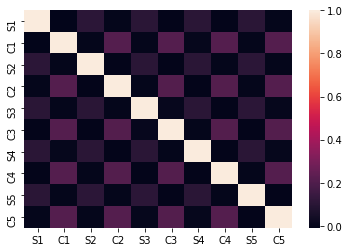

In [7]:
sns.heatmap(X_train.corr())
plt.show()

In [8]:
classes = ['Nothing', 'One pair', 'Two pairs', 'Three of a kind', 'Straight', 'Flush' ,'Full house', 'Four of a kind', 'Straight flush', 'Royal flush']

def plot_confusion_matrix(y_true, y_pred):
    fig, ax = plt.subplots(figsize=(16, 12))
    cmp = metrics.ConfusionMatrixDisplay(
        metrics.confusion_matrix(y_true, y_pred),
        display_labels=classes,
    )
    
    cmp.plot(ax=ax)
    plt.show()
    

    
def print_classification_report(y_true,y_pred):
    print(metrics.classification_report(y_true, y_pred, zero_division=0, target_names=classes))
    

def evaluate_model(model, X_true, y_true):
    
    y_pred = model.predict(X_true)
    
    plot_confusion_matrix(y_true, y_pred)
    print_classification_report(y_true,y_pred)

In [9]:
model_1 = GaussianNB()
model_1.fit(X_train, y_train)

GaussianNB()

GAUSSIAN NAIVE BAYES TRAIN SET PREDICTION RESULTS



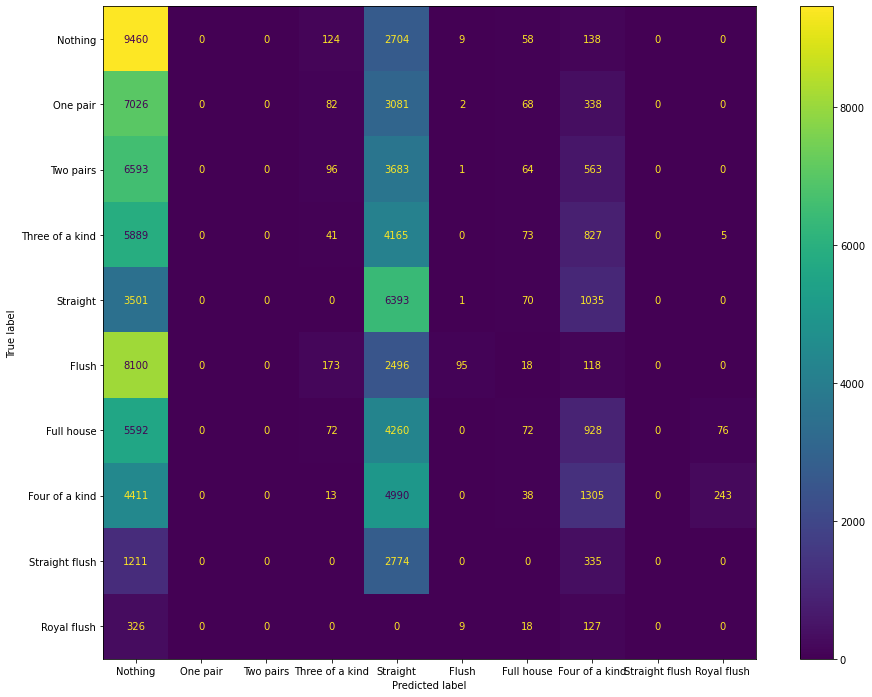

                 precision    recall  f1-score   support

        Nothing       0.18      0.76      0.29     12493
       One pair       0.00      0.00      0.00     10597
      Two pairs       0.00      0.00      0.00     11000
Three of a kind       0.07      0.00      0.01     11000
       Straight       0.19      0.58      0.28     11000
          Flush       0.81      0.01      0.02     11000
     Full house       0.15      0.01      0.01     11000
 Four of a kind       0.23      0.12      0.16     11000
 Straight flush       0.00      0.00      0.00      4320
    Royal flush       0.00      0.00      0.00       480

       accuracy                           0.18     93890
      macro avg       0.16      0.15      0.08     93890
   weighted avg       0.19      0.18      0.09     93890



In [10]:
print('GAUSSIAN NAIVE BAYES TRAIN SET PREDICTION RESULTS\n')
evaluate_model(model_1, X_train, y_train)

GAUSSIAN NAIVE BAYES VALIDATION SET PREDICTION RESULTS



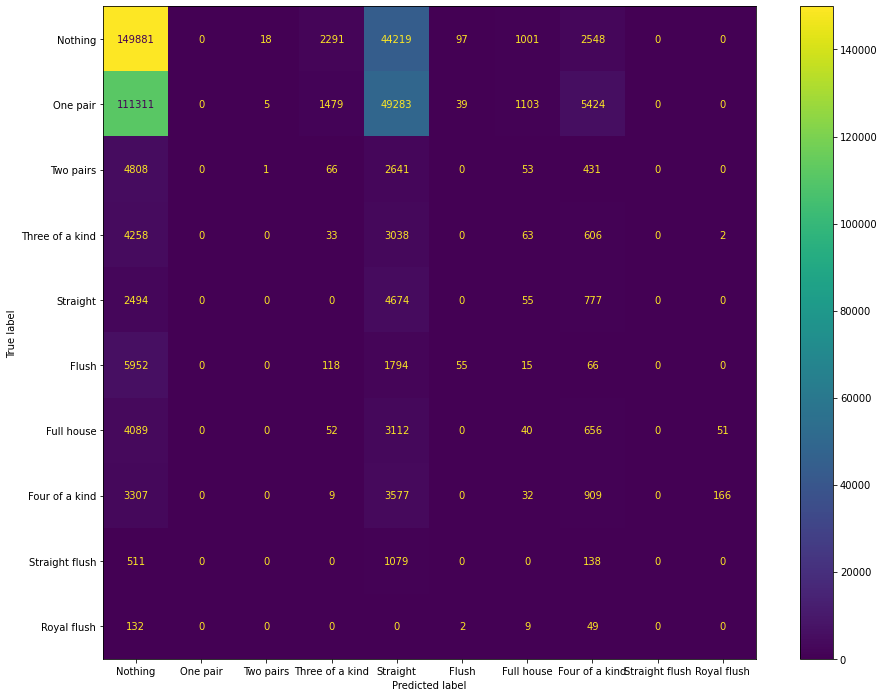

                 precision    recall  f1-score   support

        Nothing       0.52      0.75      0.62    200055
       One pair       0.00      0.00      0.00    168644
      Two pairs       0.04      0.00      0.00      8000
Three of a kind       0.01      0.00      0.01      8000
       Straight       0.04      0.58      0.08      8000
          Flush       0.28      0.01      0.01      8000
     Full house       0.02      0.01      0.01      8000
 Four of a kind       0.08      0.11      0.09      8000
 Straight flush       0.00      0.00      0.00      1728
    Royal flush       0.00      0.00      0.00       192

       accuracy                           0.37    418619
      macro avg       0.10      0.15      0.08    418619
   weighted avg       0.26      0.37      0.30    418619



In [11]:
print('GAUSSIAN NAIVE BAYES VALIDATION SET PREDICTION RESULTS\n')
evaluate_model(model_1, X_valid, y_valid)

In [12]:
params_2 = {'n_estimators': 10 * np.arange(2,4),
            'criterion': ['gini', 'entropy'],
            'max_depth': [4,12,20,50],
            'max_features': ['auto', 'log2', None],
            'bootstrap': [True, False],
            }

kfold = StratifiedKFold(5)


grid_2 = GridSearchCV(ExtraTreesClassifier(), param_grid=params_2, cv=kfold, refit=True)
grid_2.fit(X_train, y_train)
model_2 = grid_2.best_estimator_
model_2

ExtraTreesClassifier(max_depth=50, max_features=None, n_estimators=30)

EXTRA TREES CLASSIFIER TRAIN SET PREDICTION RESULTS


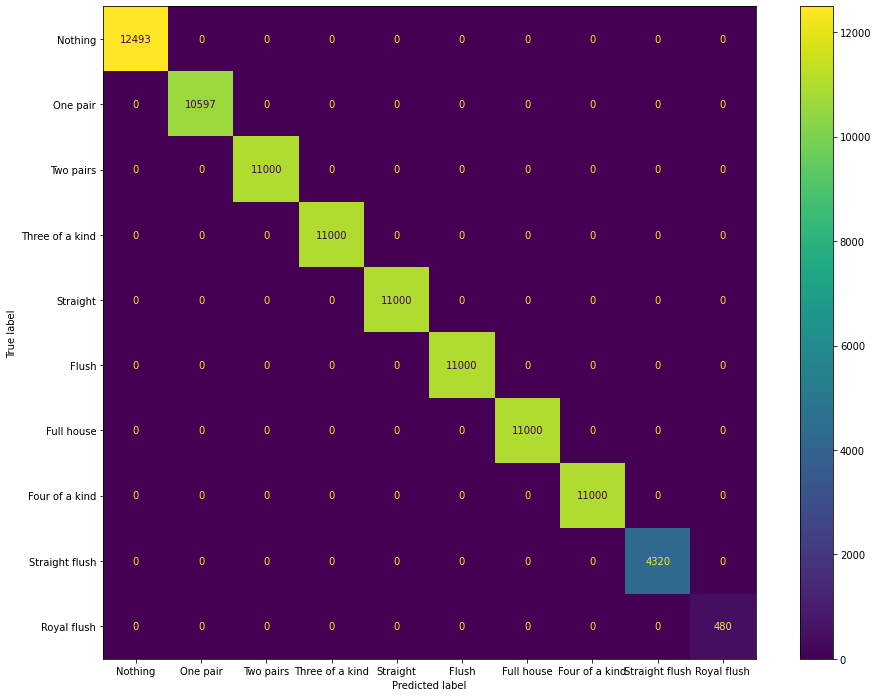

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00     12493
       One pair       1.00      1.00      1.00     10597
      Two pairs       1.00      1.00      1.00     11000
Three of a kind       1.00      1.00      1.00     11000
       Straight       1.00      1.00      1.00     11000
          Flush       1.00      1.00      1.00     11000
     Full house       1.00      1.00      1.00     11000
 Four of a kind       1.00      1.00      1.00     11000
 Straight flush       1.00      1.00      1.00      4320
    Royal flush       1.00      1.00      1.00       480

       accuracy                           1.00     93890
      macro avg       1.00      1.00      1.00     93890
   weighted avg       1.00      1.00      1.00     93890



In [13]:
print('EXTRA TREES CLASSIFIER TRAIN SET PREDICTION RESULTS')
evaluate_model(model_2, X_train, y_train)

EXTRA TREES CLASSIFIER VALIDATION SET PREDICTION RESULTS



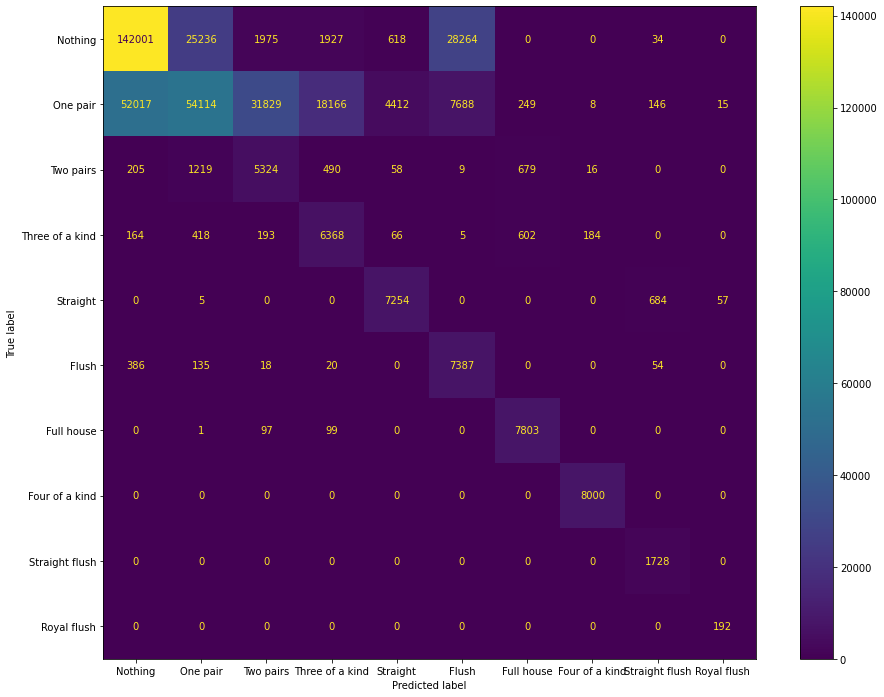

                 precision    recall  f1-score   support

        Nothing       0.73      0.71      0.72    200055
       One pair       0.67      0.32      0.43    168644
      Two pairs       0.14      0.67      0.22      8000
Three of a kind       0.24      0.80      0.36      8000
       Straight       0.58      0.91      0.71      8000
          Flush       0.17      0.92      0.29      8000
     Full house       0.84      0.98      0.90      8000
 Four of a kind       0.97      1.00      0.99      8000
 Straight flush       0.65      1.00      0.79      1728
    Royal flush       0.73      1.00      0.84       192

       accuracy                           0.57    418619
      macro avg       0.57      0.83      0.63    418619
   weighted avg       0.68      0.57      0.59    418619



In [14]:
print('EXTRA TREES CLASSIFIER VALIDATION SET PREDICTION RESULTS\n')
evaluate_model(model_2, X_valid, y_valid)

In [15]:
params_3 = {'n_neighbors': [2,5,8,10],
           'weights': ['uniform', 'distance'],
           'leaf_size': np.arange(10,40,10),
           'metric':['minkowski', 'euclidean']}

grid_3 = GridSearchCV(KNeighborsClassifier(), param_grid=params_3, cv=kfold, refit=True)
grid_3.fit(X_train, y_train)
model_3 = grid_3.best_estimator_
model_3

KNeighborsClassifier(leaf_size=20, weights='distance')

K NEIGHBORS CLASSIFIER TRAIN SET PREDICTION RESULTS



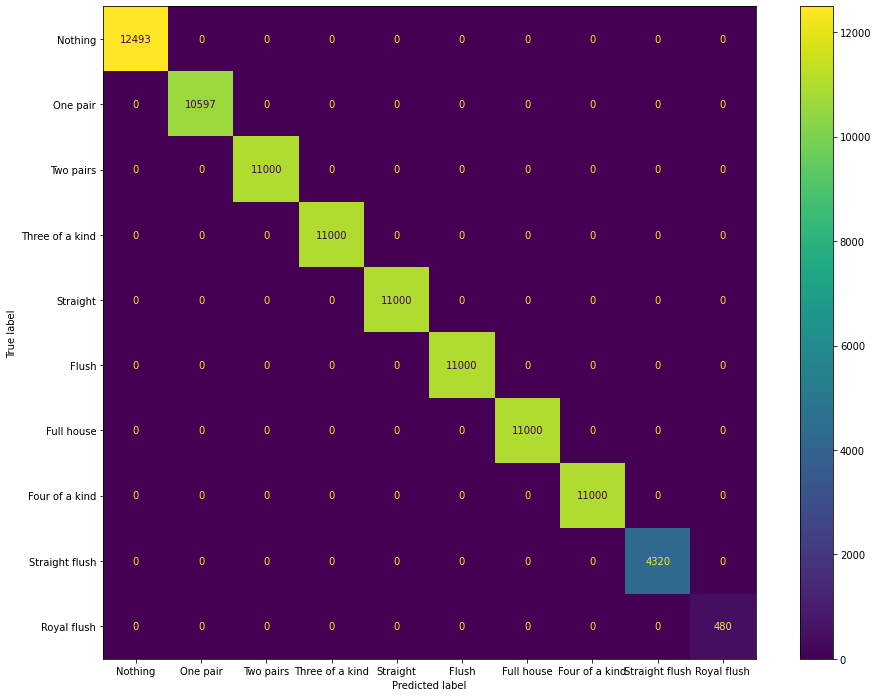

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00     12493
       One pair       1.00      1.00      1.00     10597
      Two pairs       1.00      1.00      1.00     11000
Three of a kind       1.00      1.00      1.00     11000
       Straight       1.00      1.00      1.00     11000
          Flush       1.00      1.00      1.00     11000
     Full house       1.00      1.00      1.00     11000
 Four of a kind       1.00      1.00      1.00     11000
 Straight flush       1.00      1.00      1.00      4320
    Royal flush       1.00      1.00      1.00       480

       accuracy                           1.00     93890
      macro avg       1.00      1.00      1.00     93890
   weighted avg       1.00      1.00      1.00     93890



In [16]:
print('K NEIGHBORS CLASSIFIER TRAIN SET PREDICTION RESULTS\n')
evaluate_model(model_3, X_train, y_train)

K NEIGHBORS CLASSIFIER VALIDATION SET PREDICTION RESULTS



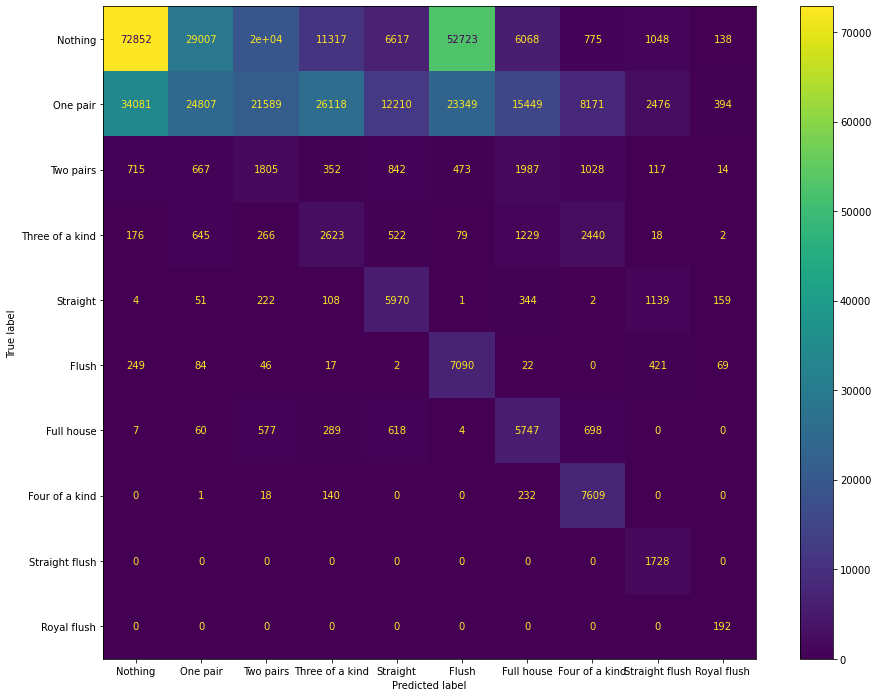

                 precision    recall  f1-score   support

        Nothing       0.67      0.36      0.47    200055
       One pair       0.45      0.15      0.22    168644
      Two pairs       0.04      0.23      0.07      8000
Three of a kind       0.06      0.33      0.11      8000
       Straight       0.22      0.75      0.34      8000
          Flush       0.08      0.89      0.15      8000
     Full house       0.18      0.72      0.29      8000
 Four of a kind       0.37      0.95      0.53      8000
 Straight flush       0.25      1.00      0.40      1728
    Royal flush       0.20      1.00      0.33       192

       accuracy                           0.31    418619
      macro avg       0.25      0.64      0.29    418619
   weighted avg       0.52      0.31      0.35    418619



In [17]:
print('K NEIGHBORS CLASSIFIER VALIDATION SET PREDICTION RESULTS\n')
evaluate_model(model_3, X_valid, y_valid)

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,10), solver='adam', alpha=0.1, activation='relu')
clf.fit(X_train,y_train)

/home/rastanatti1709/Data_Science_Projects/Poker_Hands_Prediction/poker_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 10))

MLP CLASSIFIER TRAIN SET PREDICTION RESULTS



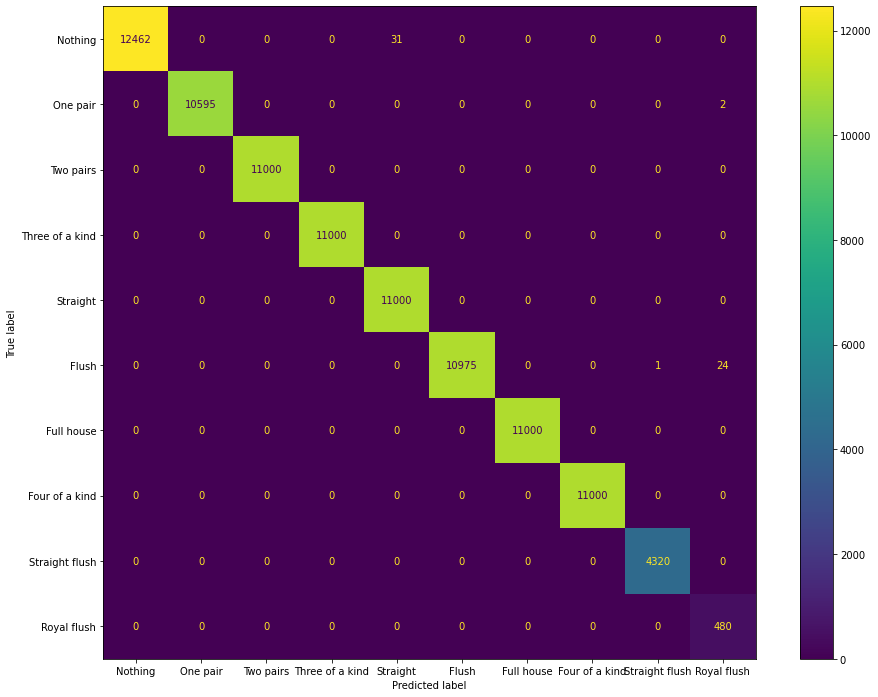

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00     12493
       One pair       1.00      1.00      1.00     10597
      Two pairs       1.00      1.00      1.00     11000
Three of a kind       1.00      1.00      1.00     11000
       Straight       1.00      1.00      1.00     11000
          Flush       1.00      1.00      1.00     11000
     Full house       1.00      1.00      1.00     11000
 Four of a kind       1.00      1.00      1.00     11000
 Straight flush       1.00      1.00      1.00      4320
    Royal flush       0.95      1.00      0.97       480

       accuracy                           1.00     93890
      macro avg       0.99      1.00      1.00     93890
   weighted avg       1.00      1.00      1.00     93890



In [19]:
print('MLP CLASSIFIER TRAIN SET PREDICTION RESULTS\n')
evaluate_model(clf, X_train, y_train)

MLP CLASSIFIER VALIDATION SET PREDICTION RESULTS



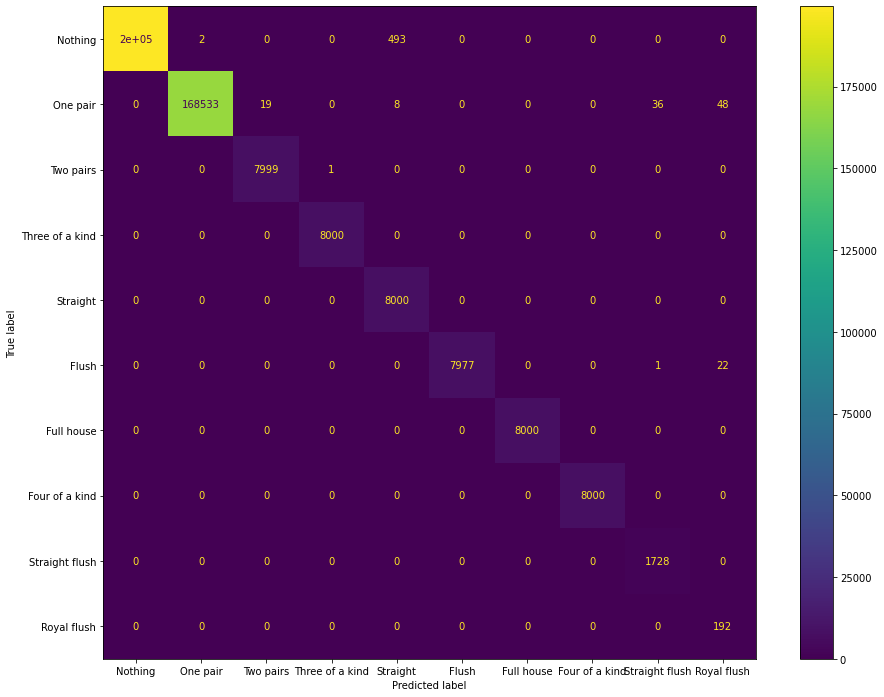

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00    200055
       One pair       1.00      1.00      1.00    168644
      Two pairs       1.00      1.00      1.00      8000
Three of a kind       1.00      1.00      1.00      8000
       Straight       0.94      1.00      0.97      8000
          Flush       1.00      1.00      1.00      8000
     Full house       1.00      1.00      1.00      8000
 Four of a kind       1.00      1.00      1.00      8000
 Straight flush       0.98      1.00      0.99      1728
    Royal flush       0.73      1.00      0.85       192

       accuracy                           1.00    418619
      macro avg       0.97      1.00      0.98    418619
   weighted avg       1.00      1.00      1.00    418619



In [20]:
print('MLP CLASSIFIER VALIDATION SET PREDICTION RESULTS\n')
evaluate_model(clf, X_valid, y_valid)

In [21]:
joblib.dump(clf, '../model/final_model')

['../model/final_model']